In [1]:
#Import relevant packages
#Join directories
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

for root,sub_dir, filenames in os.walk('Source'):
    for filename in filenames:
        print(root + "/" + filename)
        #print(os.path.join(dirname, filename).replace("\\","/"))

Source/gender_submission.csv
Source/test.csv
Source/train.csv


In [2]:
#Read CSV
data_training=pd.read_csv("Source/train.csv")
data_test=pd.read_csv("Source/test.csv")

In [3]:
#Print dataframe for inspection
print(data_training.head())
print(data_test.head())
print(data_training.info())
print(data_test.info())
print(data_training.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

<AxesSubplot:xlabel='Age', ylabel='Density'>

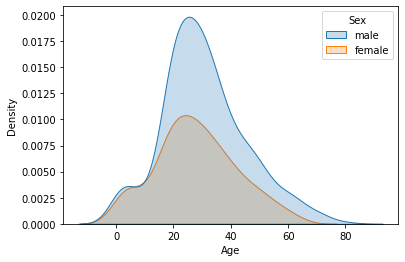

In [4]:
sns.kdeplot(data=data_training,x="Age",hue="Sex",shade=True)

In [5]:
#Standardise DataFrame
    #Add Column: data_test["Survived"], train,train_test,1. test,train_test,0.
    #Add Empty cells: Train,Age,177. Train,Age,687. Train,Embarked,2. Test,Age,86. Test,Fare,1. Test,Cabin,327.

data_test["Survived"]=np.NaN
data_training["train_test"]=1
data_test["train_test"]=0
all_data=pd.concat([data_training,data_test])

In [6]:
#Split data_training into Numerical and Categorical
data_training_num=data_training[["Age","SibSp","Parch","Fare"]]
data_training_cat=data_training[["Survived","Pclass","Name","Sex","Ticket","Cabin","Embarked"]]

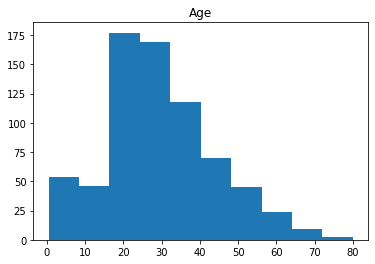

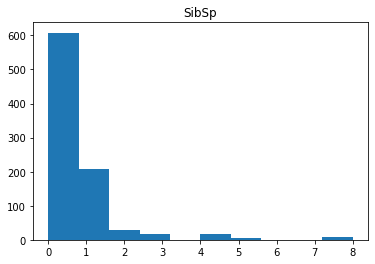

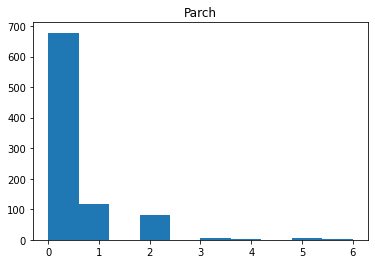

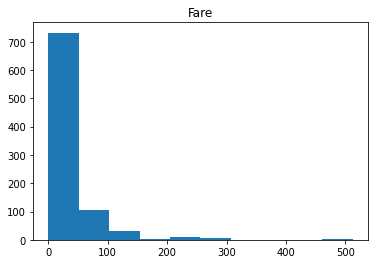

<Figure size 432x288 with 0 Axes>

In [7]:
#Plot Histogram for all numeric columns
#fig,axs=plt.subplots(nrows=len(data_training_num.columns))
for i in data_training_num:
    #sns.histplot(data=data_training_num,x=c,ax=axs[i],bins=20)
    plt.hist(data_training_num[i])
    plt.title(i)
    plt.show()
    plt.clf()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000
                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


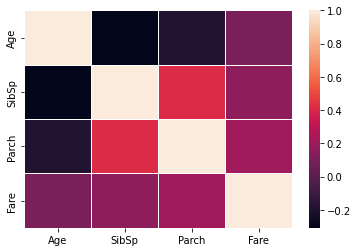

In [8]:
#Inspect correlation between numeric columns
print(data_training_num.corr())
sns.heatmap(data_training_num.corr(),linewidth=0.5)
print(pd.pivot_table(data_training, index = 'Survived', values = ['Age','SibSp','Parch','Fare']))

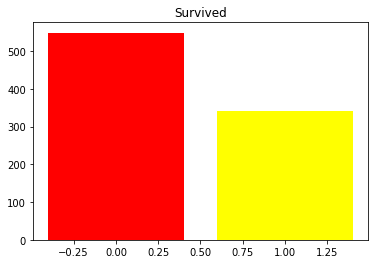

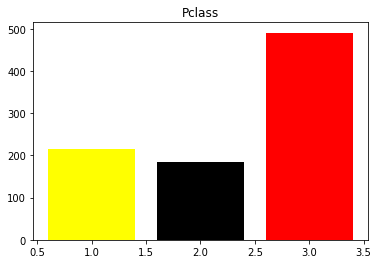

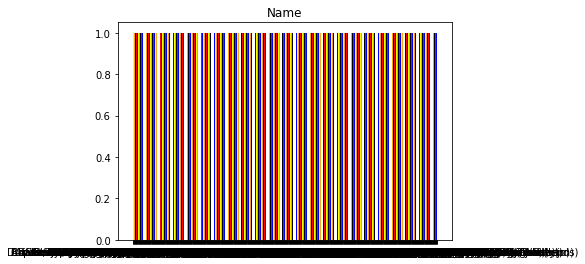

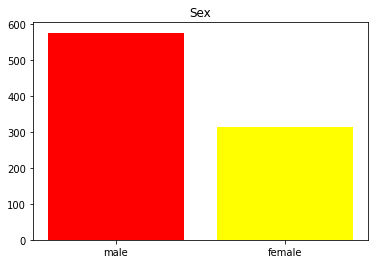

In [ ]:
for i in data_training_cat:
    plt.bar(data_training_cat[i].value_counts().index,data_training_cat[i].value_counts(),color=['red', 'yellow', 'black', 'blue', 'orange'])
    plt.title(i)
    plt.show()

In [ ]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(data_training_cat, index = 'Survived', columns = 'Pclass',aggfunc ='count'))
print("\n")
print(pd.pivot_table(data_training_cat, index = 'Survived', columns = 'Sex',aggfunc ='count'))
print("\n")
print(pd.pivot_table(data_training_cat, index = 'Survived', columns = 'Embarked',aggfunc ='count'))

In [ ]:
#Feature Engineering for Cabin
#Split the string and plot a bar chart.
data_training['Cabin_Multiple'] = data_training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
print(data_training['Cabin_Multiple'].value_counts())
plt.bar(data_training["Cabin_Multiple"].value_counts().index,data_training["Cabin_Multiple"].value_counts(),color=['red', 'yellow', 'black', 'blue', 'orange'])

In [ ]:
#Inspect using a pivot table
print(pd.pivot_table(data_training, index = 'Survived', columns = 'Cabin_Multiple', aggfunc ='count'))

In [ ]:
#Feature Engineering
#Extract first letter of ticket.
data_training["Cabin_Adv"]=data_training["Cabin"].apply(lambda x: str(x)[0])
#print(data_training["Cabin_Adv"])
print(data_training.Cabin_Adv.value_counts())
data_trial=data_training[["Cabin_Adv","Fare"]]
data_trial_n_Cabin=data_training[data_training["Cabin_Adv"]=="n"]
print(data_trial_n_Cabin.describe())
data_trial_groupby=data_trial.groupby(["Cabin_Adv"]).mean()
print(data_trial_groupby)
#n Cabin is around the same as F,G Cabin. The other Cabins are mean price more expensive than n,F and G.
sns.scatterplot(x="Cabin_Adv",y="Fare",data=data_trial)
#plt.bar(data_training["Cabin_Adv"].value_counts().index,data_training["Cabin_Adv"].value_counts(),color=['red', 'yellow', 'black', 'blue', 'orange'])
print(pd.pivot_table(data_training,index='Survived',columns='Cabin_Adv', values = 'Name', aggfunc='count'))

In [ ]:
#Feature Engineering for Ticket
data_training['numeric_ticket'] = data_training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data_training['ticket_letters'] = data_training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
print(data_training["ticket_letters"])

In [ ]:
print(data_training['numeric_ticket'].value_counts())
print(data_training['ticket_letters'].value_counts())

In [ ]:
print(pd.pivot_table(data_training,index="Survived",columns="numeric_ticket",aggfunc="count"))

In [ ]:
data_training['name_title'] = data_training.Name.apply(lambda x: x.split(' ')[1])
print(data_training['name_title'].value_counts())

In [ ]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(data_training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(data_training.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])
print(all_dummies.columns)
print(all_dummies.head())
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [ ]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived